In [64]:
import requests 
from selenium import webdriver as wd 
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
import time
import random
import re
import pandas as pd
import json # import json module
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [65]:
with open('탄산음료.json') as json_file:
    json_data = json.load(json_file)

In [66]:
df = pd.DataFrame(json_data['data'])

In [67]:
df

,level_0,index,Post,Hashtags,Locates,Date,Likes
0,0,0,[마운틴듀 캔 공모전!! 나도 했어!\n4월 28일까지 하니깐 참여해봐!! 1등은 ...,"[나만의마운틴듀, 마운틴듀캔공모전, 마운틴듀, AD]",[],2019년 4월 21일,"[7,106]"
1,1,1,[#gs25 에서 10월 중순 출시\n예정인\n.\n....,"[gs25, 캠핑, gs25, 대한민국대표편의점, 롯데칠성, 펩시, 마운틴듀, 게토...",[],2020년 9월 26일,"[1,191]"
2,2,2,[듀한잔하러옴ㅋㅋ\n입고있는 옷은 다음마켓에 〰❤️〰\n@rapbeatfestiva...,"[랩비트페스티벌, 2018, RAPBEATFESTIVAL, 힙합, 페스티벌, 불토,...",[고척스카이돔],2018년 9월 16일,"[4,518]"
3,3,3,[⠀\n[Sparkling drops] | 2019\n마운틴 듀 일ᄅ...,[],[],2019년 4월 30일,"[1,388]"
4,4,4,[#그린카드 로 결제한 #마운틴듀\n둘 다 초록초록\n#iabstudio 풀장착하고...,"[그린카드, 마운틴듀, iabstudio, 네온의짜릿함, 빈지노, 인스타푸드, 인스...",[Lotte Yicheon Outlet 롯데이천아울렛],2020년 8월 14일,[156]
...,...,...,...,...,...,...,...
34483,9995,9995,[젠장..\n오늘도 목욕 못했다.😱\n내일은 꼭 씻자😂\n.\n.\n#보물1호 #펩...,"[보물1호, 펩시, 강아지계의_유승호, pepsi, 보물2호, 키엘, kiehl, ...",[],2019년 9월 10일,[63]
34484,9996,9996,[❤️FOR THE LOVE OF IT💙],"[인스타그램, 셀스타그램, 덕질스타그램, 빅스, vixx, 별빛, 데일리스타그램, ...",[],2019년 9월 9일,[56]
34485,9997,9997,"[무엇보다 항상 즐겁게 일할 수 있음에 저희 모든 직원들과 연출팀, 파트너 분들에게...","[웨스트브릿지, 공연기획, 쇼케이스, 펩시, 펩시쇼케이스, FORTHELOVEOFI...",[],2019년 9월 9일,[43]
34486,9998,9998,[8.15 광복절 기념 펩시콜라 로보트태권V 한정판 피규어 박스입니다.\n\n8월 ...,"[펩시콜라, 펩시, 태극, 펩시태극마크, 로보트태권V펩시콜라, 815펩시코카콜라, ...",[서울 어딘가],2019년 9월 9일,[8]


# 1. Word Cloud

### - Hahstags

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [69]:
tags = [element for array in list(df.Hashtags) for element in array]

In [70]:
tags[0:5]

['나만의마운틴듀', '마운틴듀캔공모전', '마운틴듀', 'AD', 'gs25']

In [71]:
soda_stop_words = ['error','마운틴듀','나랑드사이다', '제로콜라','코카콜라', '펩시', '강다니엘', '박보검', 'kangdaniel','parkbogum', \
                  'pepsi', '朴寶劍', 'パクボゴム', 'คโบกอม', '사혜준', '에이스침대','bogummy', 'bogum', '박보검팬미팅', '블루버드', 'bluebird', \
                  '청춘기록', '서복', '보검복지부', '영화서복', 'cocacola', 'bloomin']

In [72]:
cv = CountVectorizer(max_features=10000, stop_words = soda_stop_words)

In [73]:
tdm = cv.fit_transform(tags)

In [74]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat 
})

In [75]:
word_count.sort_values('빈도', ascending=False).head(15)

,단어,빈도
7706,일상,3281
168,allmylove,2762
4888,먹스타그램,2681
8078,좋은날,2556
501,dearmyfriend,2550
1743,tvn드라마,2268
8824,콜라,2153
1745,tvn월화드라마,2043
2846,姜丹尼尔,1871
461,cyan,1837


In [76]:
wc = WordCloud(background_color='white',
               width=800, height=800, 
               font_path='NanumBarunGothicLight.ttf',
              colormap = 'hsv', # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
              max_words = 200)

In [77]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()
cloud = wc.fit_words(count_dic)

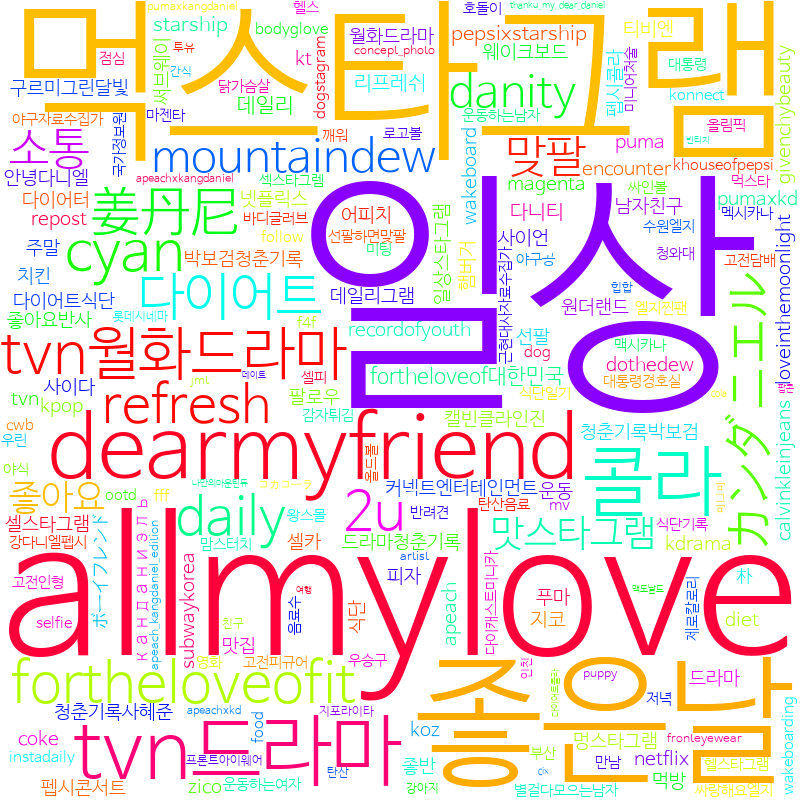

In [78]:
cloud.to_image()

### - Locates

In [58]:
locates = [element for array in list(df.Locates) for element in array]

In [59]:
monster_lc_stop_words = ['error','']
cv = CountVectorizer(max_features=10000, stop_words = monster_lc_stop_words)
tdm = cv.fit_transform(locates)
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat 
})

In [60]:
word_count.sort_values('빈도', ascending=False).head()

,단어,빈도
621,korea,634
1015,south,383
961,seoul,291
185,busan,143
2489,속초콜라,132


In [61]:
wc = WordCloud(background_color='white',
               width=800, height=800, 
               font_path='NanumBarunGothicLight.ttf',
              colormap = 'hsv', # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
              max_words = 200)

In [62]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()
cloud = wc.fit_words(count_dic)

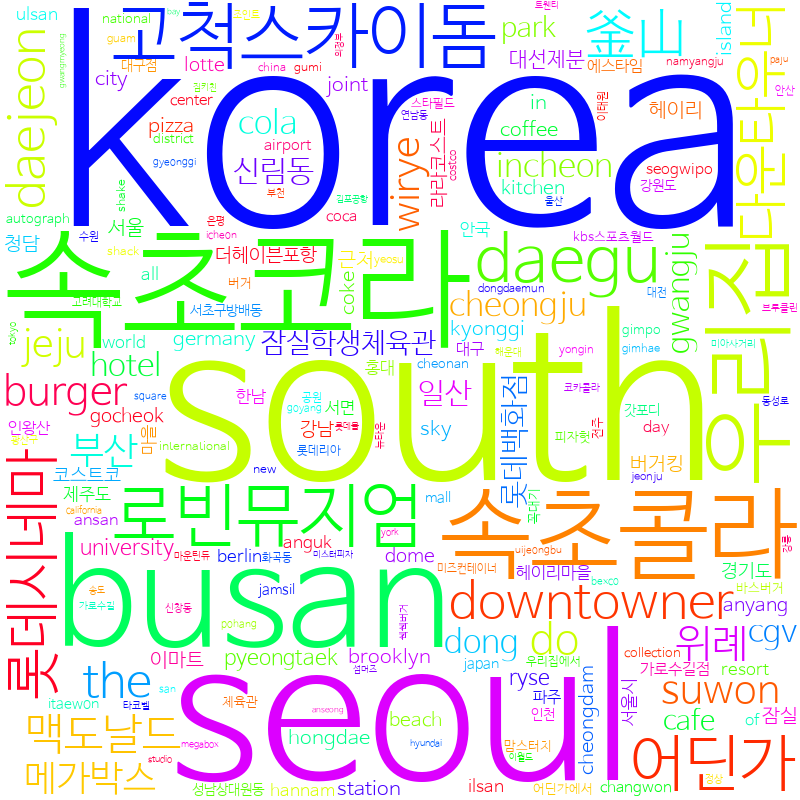

In [63]:
cloud.to_image()

# 2. Embedding

### - LSA

### - tags

In [79]:
tdm.shape

(547131, 10000)

In [80]:
# one hot encoding
import numpy as np

one_hot = np.eye(10000)

In [81]:
words = cv.get_feature_names()

In [82]:
tokens = tags

In [83]:
%%time
doc = np.zeros((1, 10000))

for token in tokens:
    try:
        i = words.index(token)
        doc += one_hot[i]
    except ValueError:
        pass

Wall time: 1min 13s


In [84]:
from sklearn.decomposition import TruncatedSVD

In [85]:
svd = TruncatedSVD(n_components=1000)

In [86]:
svd.fit(tdm)

TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=5,
             random_state=None, tol=0.0)

In [87]:
svd.components_.shape

(1000, 10000)

In [88]:
word_emb = svd.components_.T

In [89]:
indices = []
target = list(word_count.sort_values('빈도', ascending=False)['단어'][0:100])
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

일상 7706
allmylove 168
먹스타그램 4888
좋은날 8078
dearmyfriend 501
tvn드라마 1743
콜라 8824
tvn월화드라마 1745
姜丹尼尔 2846
cyan 461
fortheloveofit 694
2u 94
ยล 1930
งแดเน 1927
カンダニエル 2774
다이어트 3952
daily 469
refresh 1436
mountaindew 1186
맞팔 4794
소통 6122
danity 493
맛스타그램 4746
좋아요 8066
fortheloveof대한민국 697
데일리 4206
다니티 3915
지코 8176
starship 1614
리프레쉬 4631
pepsixstarship 1324
커넥트엔터테인먼트 8643
coke 407
recordofyouth 1430
사이언 5786
푸마 9422
코카콜라 2606
repost 1442
먹방 4875
zico 1902
朴宝剑 2861
tvn 1739
koz 1012
선팔 6002
다이어트식단 3973
puma 1390
월화드라마 7446
청춘기록박보검 8370
loveinthemoonlight 1099
드라마청춘기록 4319
남자친구 3739
다이어터 3939
구르미그린달빛 3424
청춘기록사혜준 8372
encounter 595
티비엔 9139
박보검청춘기록 5225
드라마 4318
원더랜드 7416
kdrama 954
넷플릭스 3822
ボーイフレンド 2807
netflix 1220
팔로우 9219
햄버거 9697
펩시콘서트 9321
써브웨이 6608
dothedew 559
치킨 8498
канданиэль 1912
givenchybeauty 727
kpop 1014
맛집 4774
셀카 6076
kt 1032
calvinkleinjeans 316
subwaykorea 1641
캘빈클라인진 8623
웨이크보드 7448
셀스타그램 6075
운동 7363
펩시콜라 9323
일상스타그램 7718
wakeboard 1800
데일리그램 4208
diet 515
magenta

In [90]:
word_emb = svd.components_.T

In [91]:
from adjustText import adjust_text
from matplotlib import pyplot
from matplotlib import font_manager, rc

In [92]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name)

Wall time: 52.4 s


197

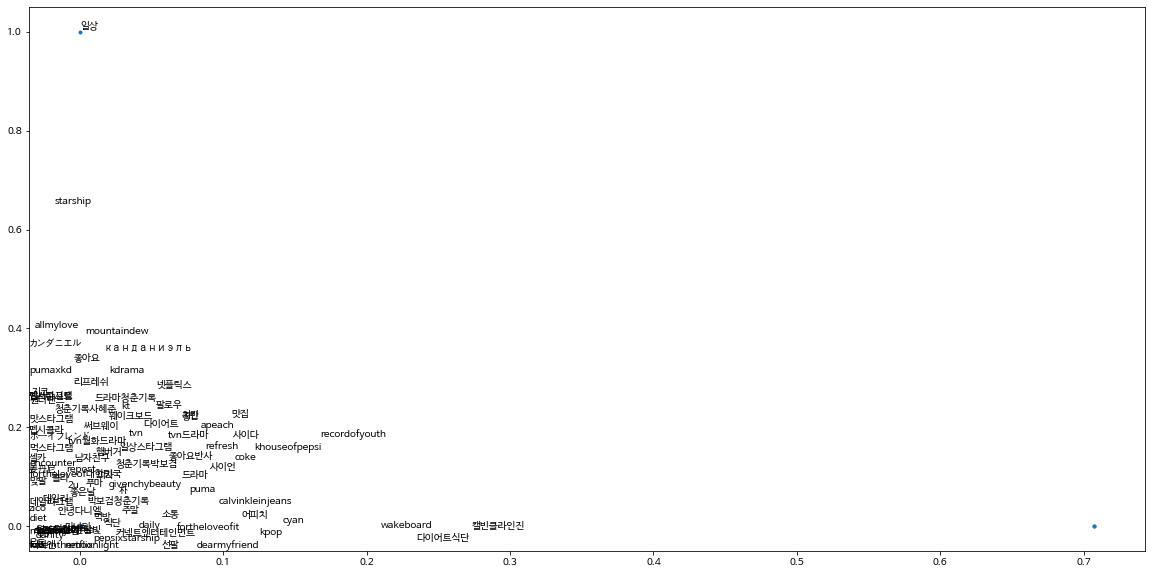

In [93]:
%%time

comp1 = 0
comp2 = 1

pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.plot(word_emb[indices, comp1], word_emb[indices, comp2], '.')

texts = [pyplot.text(word_emb[i, comp1], word_emb[i, comp2], w) for i, w in zip(indices, target)]

adjust_text(texts)

### - location

### - T-SNE

In [94]:
from sklearn.manifold import TSNE

In [95]:
tsne = TSNE()

In [96]:
%%time
pos = tsne.fit_transform(word_emb)

Wall time: 5min 16s


114

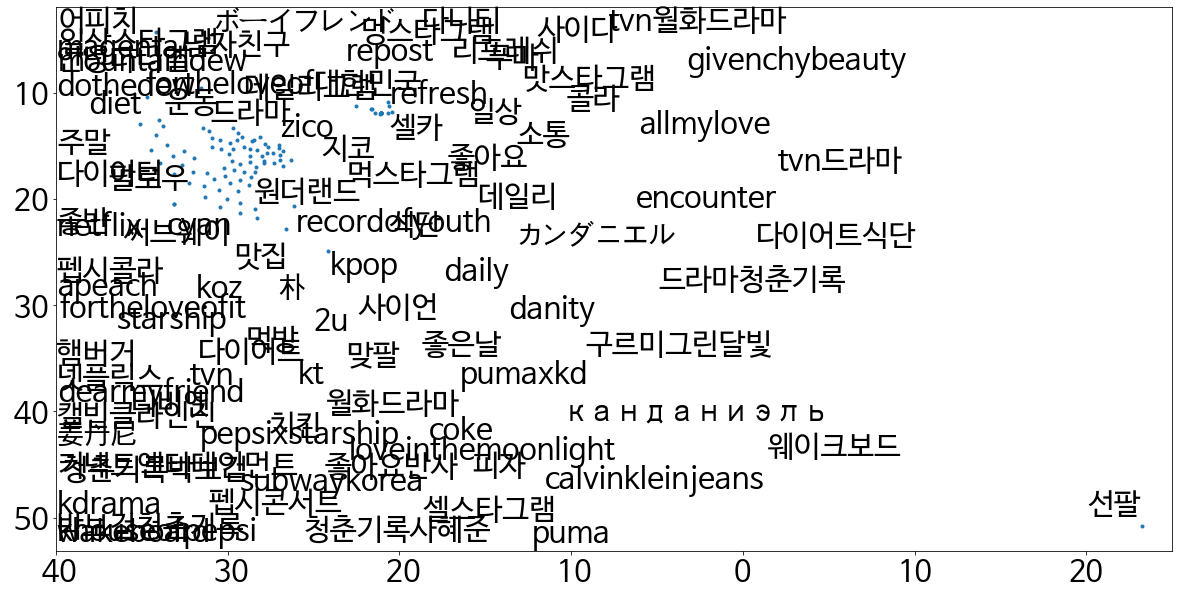

In [106]:
pyplot.rcParams["figure.figsize"] = (20,10)

pyplot.plot(pos[indices, 0], pos[indices, 1], '.')

pyplot.xlim(-40,25)

texts = [pyplot.text(pos[i, 0], pos[i, 1], w) for i, w in zip(indices, target)]

adjust_text(texts)

### - Word2Vec

In [98]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA

In [99]:
sentences = list(df['Hashtags'])

In [100]:
model = Word2Vec(sentences, size = 1000, min_count = 200, workers = 4, window = 100)

In [101]:
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [102]:
pca = PCA(n_components = 2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

In [103]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name, size = 30)

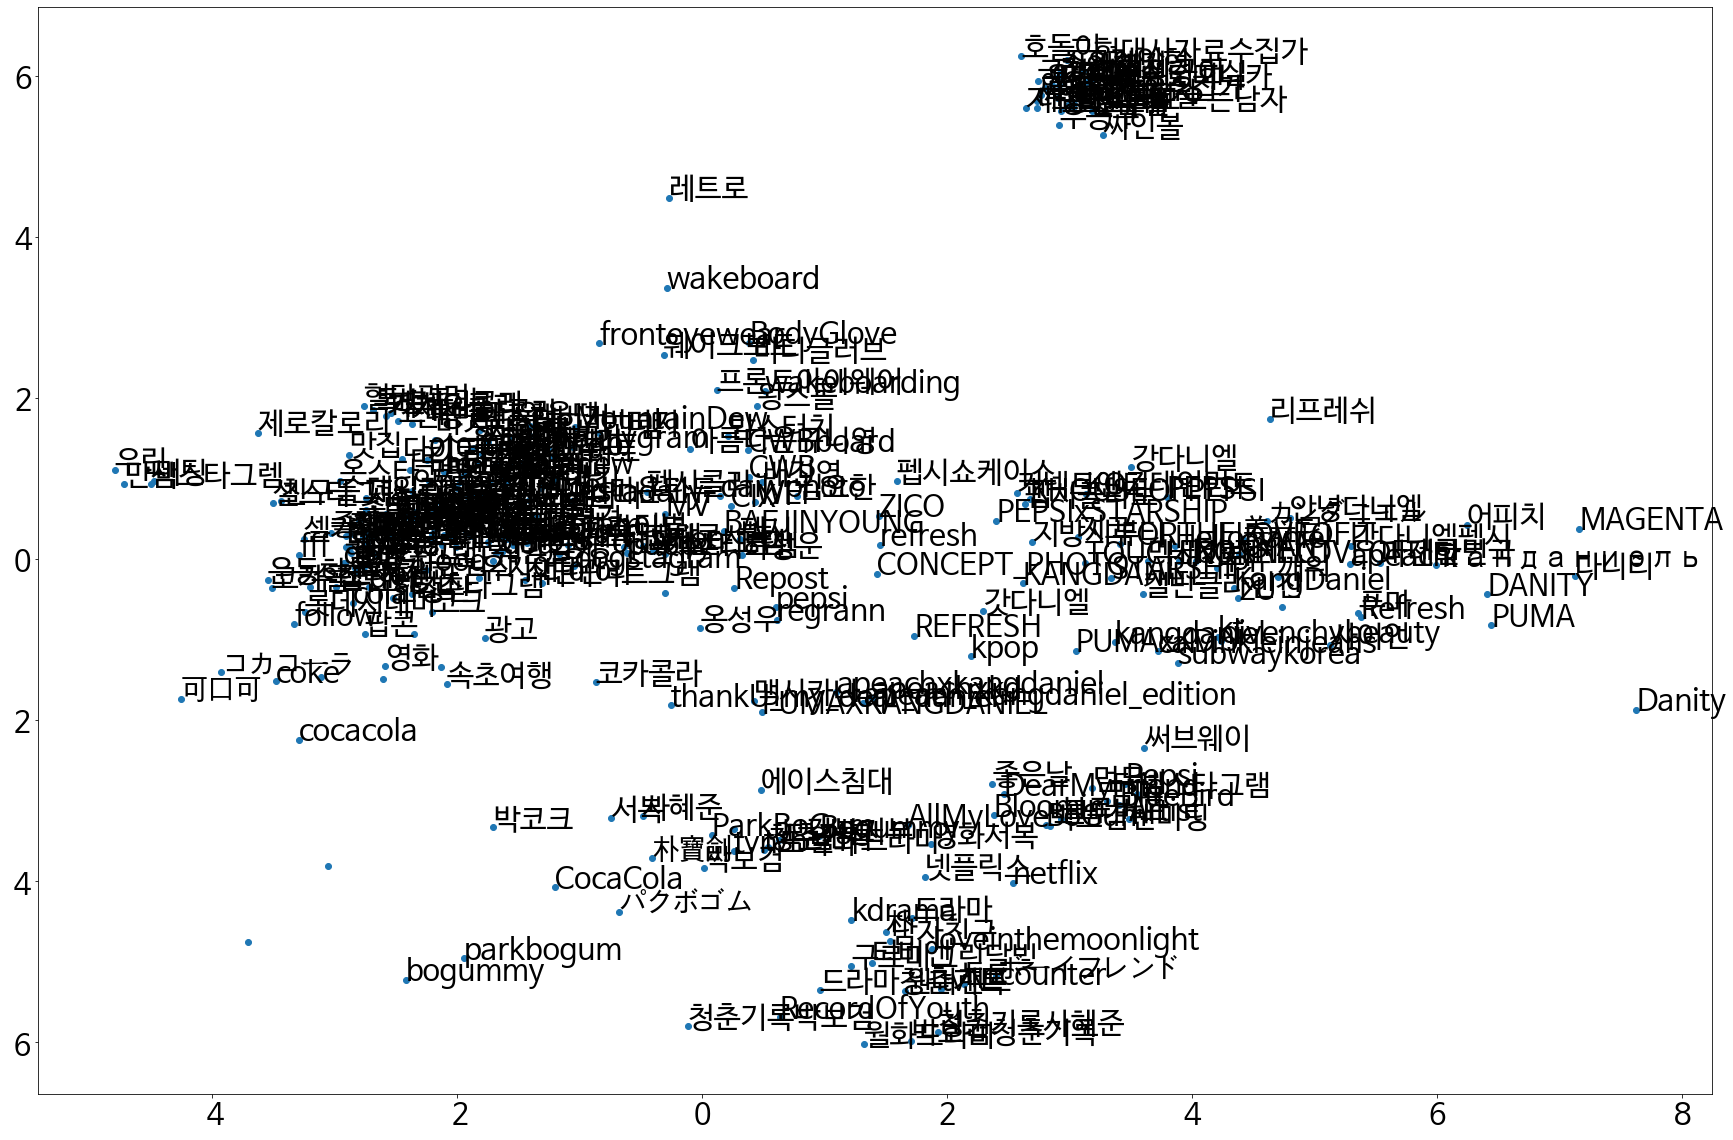

In [104]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [30, 20]
plt.scatter(xs, ys)
for i,v in enumerate(vocabs):
    plt.annotate(v, xy = (xs[i], ys[i]))

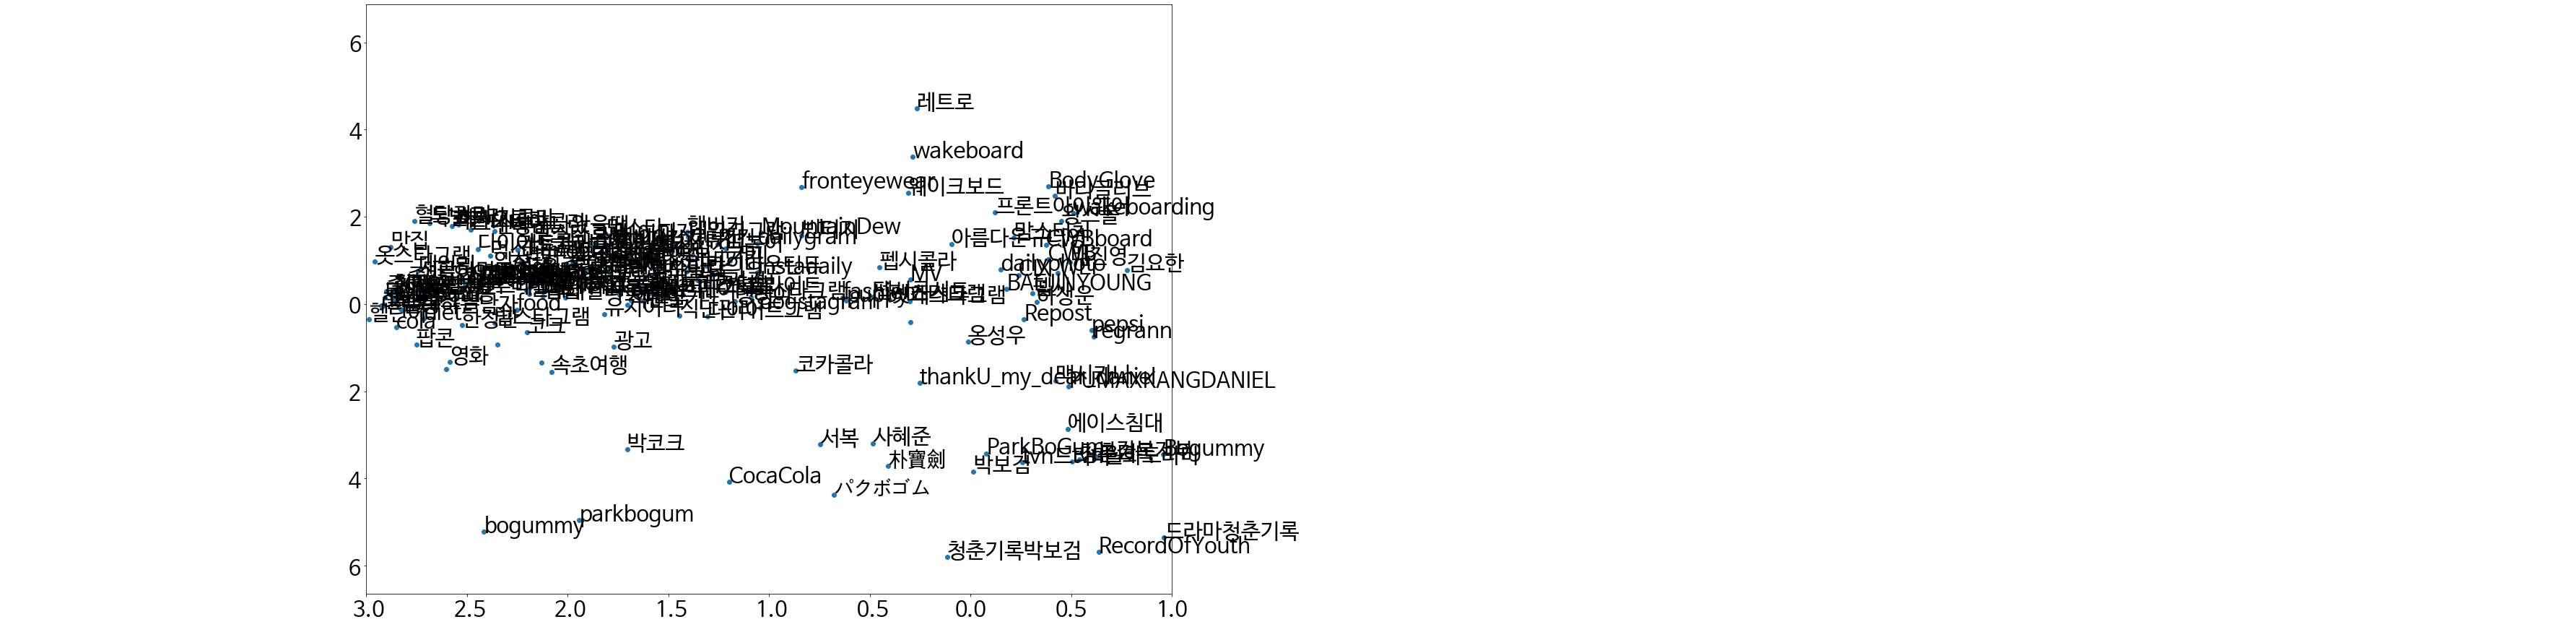

In [105]:
plt.rcParams['figure.figsize'] = [20, 15]

plt.scatter(xs, ys, marker = 'o')

plt.xlim(-3,1)

for i,v in enumerate(vocabs):
    plt.annotate(v, xy = (xs[i], ys[i]))
    
plt.show()